In [1]:
2+2

4

**DH 100 Notebook Demo** 
$x = \frac{1}{2}$

In [2]:
x = 2+2

In [9]:
x

16

In [4]:
x
9+9

18

In [5]:
print(x)
9+9

4


18

In [7]:
for i in range(10):
  print(i)
x

0
1
2
3
4
5
6
7
8
9


4

In [8]:
x = 16
print(x)

16


In [16]:
def sumx(inputx):
  outputx = x + 6
  return outputx

In [17]:
sumx(x)

22

In [ ]:
[1,2,3, [1,2,3]]

#### Data Analysis of Bike Trips

Starting here

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
pip install newspaper3k

     |████████████████████████████████| 215kB 2.9MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 7.4MB 24.6MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13538 sha256=b0d65465cab09eb8b0def7f9de71a1bdf14ae64fc709cc53085d22b7dbfa1855
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=dba1f7b1624c1cf4c67c7f9b723d86e11a8bb6ce280e0c799331eb4c88e0b195
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=e8eb34e69f8adba263f3121ba72e74960b8f1c1ea5c305c622a0a3fcb13cf7c2
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35d

In [ ]:
trips = pd.read_csv("sample_data/trip.csv")

In [31]:
trips.head(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [33]:
trips.shape

(669959, 11)

In [34]:
trips.groupby("start_station_name").duration.mean()

start_station_name
2nd at Folsom                                     581.709849
2nd at South Park                                 687.877054
2nd at Townsend                                   791.664977
5th at Howard                                     927.342599
Adobe on Almaden                                 1201.237072
                                                    ...     
Townsend at 7th                                   676.522467
University and Emerson                           7090.239418
Washington at Kearney                            1979.307745
Washington at Kearny                             1653.497670
Yerba Buena Center of the Arts (3rd @ Howard)     935.167541
Name: duration, Length: 74, dtype: float64

In [35]:
trips.groupby(["start_station_name", "end_station_name"]).duration.mean()

start_station_name                             end_station_name                             
2nd at Folsom                                  2nd at Folsom                                    3740.699029
                                               2nd at South Park                                 288.154830
                                               2nd at Townsend                                   382.461818
                                               5th at Howard                                     477.303406
                                               Beale at Market                                   665.445415
                                                                                                   ...     
Yerba Buena Center of the Arts (3rd @ Howard)  Temporary Transbay Terminal (Howard at Beale)     839.482143
                                               Townsend at 7th                                   880.059497
                                           

In [38]:
trips.isnull().sum(axis=0)

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [39]:
trips["start_date"]

0         8/29/2013 14:13
1         8/29/2013 14:42
2         8/29/2013 10:16
3         8/29/2013 11:29
4         8/29/2013 12:02
               ...       
669954      9/1/2014 4:21
669955      9/1/2014 3:16
669956      9/1/2014 0:05
669957      9/1/2014 0:05
669958      9/1/2014 0:05
Name: start_date, Length: 669959, dtype: object

In [40]:
pd.to_datetime(trips["start_date"])

0        2013-08-29 14:13:00
1        2013-08-29 14:42:00
2        2013-08-29 10:16:00
3        2013-08-29 11:29:00
4        2013-08-29 12:02:00
                 ...        
669954   2014-09-01 04:21:00
669955   2014-09-01 03:16:00
669956   2014-09-01 00:05:00
669957   2014-09-01 00:05:00
669958   2014-09-01 00:05:00
Name: start_date, Length: 669959, dtype: datetime64[ns]

In [41]:
trips["start_date"] = pd.to_datetime(trips["start_date"])
trips["end_date"] = pd.to_datetime(trips["end_date"])

In [42]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [43]:
trips["day_of_week"] = trips["start_date"].dt.dayofweek

In [45]:
trips.shape

(669959, 12)

In [49]:
trips

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,3
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,3
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,3
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,3
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,3
...,...,...,...,...,...,...,...,...,...,...,...,...
669954,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,Subscriber,94118,0
669955,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100,0
669956,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,Customer,32,0
669957,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,Customer,32,0


In [50]:
trips["day_of_week_string"] = trips["start_date"].dt.day_name()

In [51]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week,day_of_week_string
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,3,Thursday
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,3,Thursday
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,3,Thursday
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,3,Thursday
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,3,Thursday


In [65]:
trips["day_of_week_string"] = trips["day_of_week"].replace({
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
})
trips

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week,day_of_week_string
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,3,Thursday
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,3,Thursday
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,3,Thursday
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,3,Thursday
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669954,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,Subscriber,94118,0,Monday
669955,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100,0,Monday
669956,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,Customer,32,0,Monday
669957,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,Customer,32,0,Monday


In [63]:
tripdays = trips.groupby("day_of_week_string").count()
tripdays

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week
day_of_week_string,,,,,,,,,,,,
Friday,109361,109361,109361,109361,109361,109361,109361,109361,109361,109361,108487,109361
Monday,115873,115873,115873,115873,115873,115873,115873,115873,115873,115873,115071,115873
Saturday,44785,44785,44785,44785,44785,44785,44785,44785,44785,44785,43431,44785
Sunday,38391,38391,38391,38391,38391,38391,38391,38391,38391,38391,37245,38391
Thursday,119089,119089,119089,119089,119089,119089,119089,119089,119089,119089,118317,119089
Tuesday,122259,122259,122259,122259,122259,122259,122259,122259,122259,122259,121401,122259
Wednesday,120201,120201,120201,120201,120201,120201,120201,120201,120201,120201,119388,120201


In [67]:
sortedtrips = trips
sortedtrips["day_of_week_string"] = pd.Categorical(sortedtrips["day_of_week_string"], categories = ["Monday",
                                                                                                    "Tuesday",
                                                                                                    "Wednesday",
                                                                                                    "Thursday",
                                                                                                    "Friday"], ordered=True)
tripdays =  sortedtrips.groupby("day_of_week").count()
tripdays

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week_string
day_of_week,,,,,,,,,,,,
0,115873,115873,115873,115873,115873,115873,115873,115873,115873,115873,115071,115873
1,122259,122259,122259,122259,122259,122259,122259,122259,122259,122259,121401,122259
2,120201,120201,120201,120201,120201,120201,120201,120201,120201,120201,119388,120201
3,119089,119089,119089,119089,119089,119089,119089,119089,119089,119089,118317,119089
4,109361,109361,109361,109361,109361,109361,109361,109361,109361,109361,108487,109361
5,44785,44785,44785,44785,44785,44785,44785,44785,44785,44785,43431,0
6,38391,38391,38391,38391,38391,38391,38391,38391,38391,38391,37245,0


In [68]:
dayofweek = list(tripdays.index.values)

In [69]:
dayofweek

[0, 1, 2, 3, 4, 5, 6]

In [74]:
dayofweek = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday","Sat","Sun"]

In [75]:
counts = list(tripdays.duration.values)

In [76]:
counts

[115873, 122259, 120201, 119089, 109361, 44785, 38391]

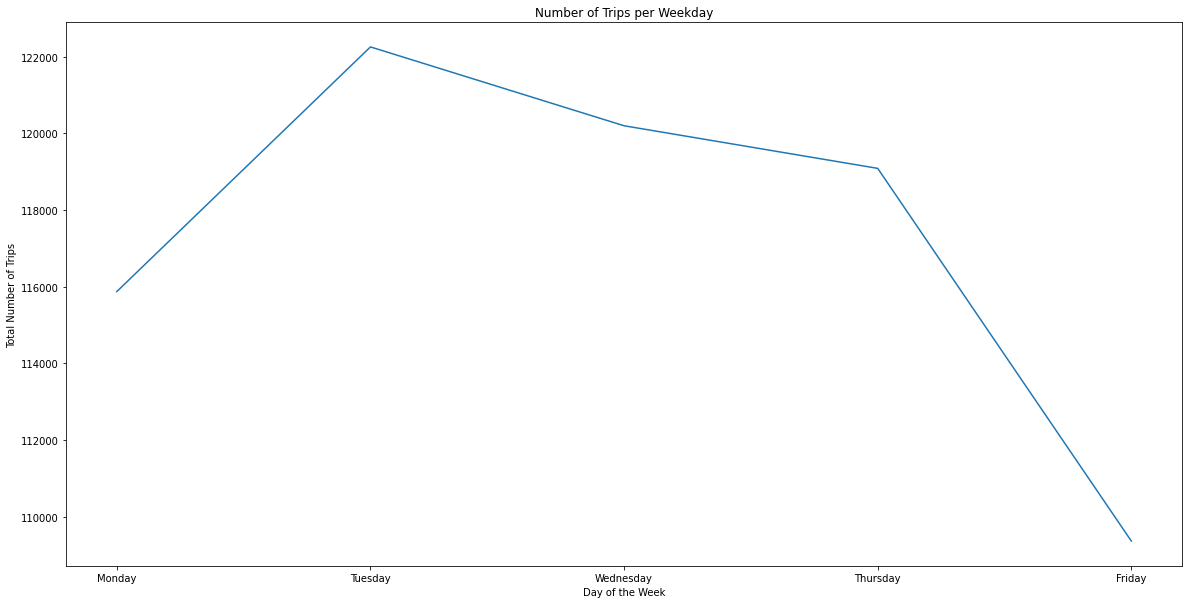

In [83]:
plt.figure(figsize = (20,10))
plt.plot(dayofweek[:5], counts[:5])
plt.title("Number of Trips per Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Total Number of Trips")
plt.savefig("numtrips.jpg")
plt.show()


SyntaxError: ignored

In [114]:
np.mean(trips["id"])

460382.0098991132

In [115]:
idtrips1 = trips[trips["id"]<np.mean(trips["id"])]
idtrips2 = trips[trips["id"]>=np.mean(trips["id"])]

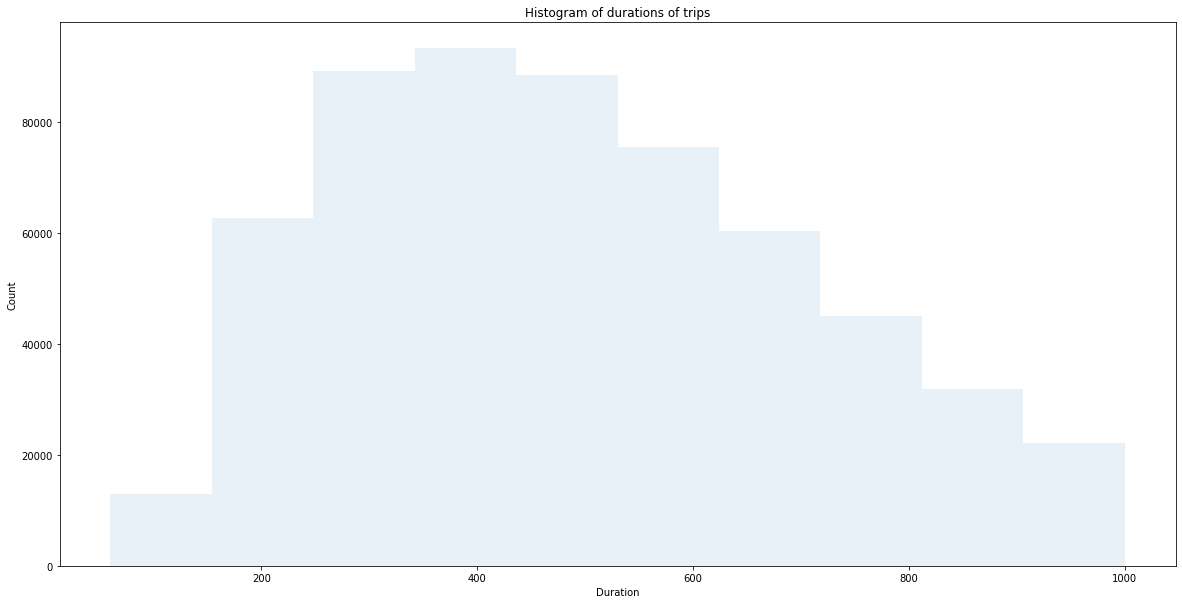

In [116]:
plt.figure(figsize=(20,10))
plt.hist(trips[trips["duration"]<= 1000].duration, bins = 10, alpha = 0.1)
plt.title("Histogram of durations of trips")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

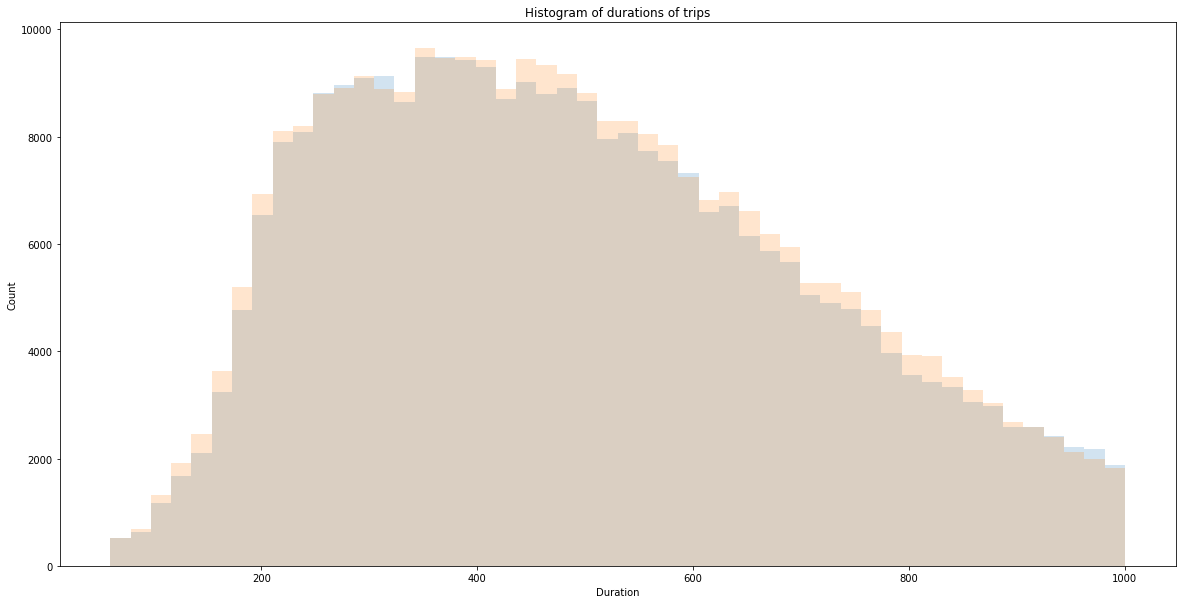

In [119]:
plt.figure(figsize=(20,10))
plt.hist(idtrips1[idtrips1["duration"]<= 1000].duration, bins = 50, alpha = 0.2)
plt.hist(idtrips2[idtrips2["duration"]<= 1000].duration, bins = 50, alpha = 0.2)

plt.title("Histogram of durations of trips")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()